# Classification of Fashion-MNIST images-Using logistic regression

Import required modules

In [1]:
from __future__ import print_function , division
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
import random 

Load the data file

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Feature normalization to training,test set, and convert yn to the format of one-hot encoding

In [3]:
#reshape
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images= test_images.astype('float32')

#normalize the value of every pixel into the range of 0 to 1
num_classes=10
train_images /= 255
test_images /= 255
print(train_images.shape[0], 'training samples')
print(test_images.shape[0], 'test samples')

# convert yn to the format of one-hot encoding
train_labels = np.eye(num_classes)[train_labels]
test_labels = np.eye(num_classes)[test_labels] 


60000 training samples
10000 test samples


split the data into training, validation, and test

In [4]:
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', test_images.shape, test_labels.shape)

train: (54000, 784) (54000, 10)
validation: (6000, 784) (6000, 10)
test: (10000, 784) (10000, 10)


Randomly obtained batch_size from dataset and define logistic regression model

In [5]:
import tensorflow as tf
import numpy as np

def next_batch(batch_size, data, labels):
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def build_model(X, num_input, num_output):
    n0 = num_input   # MNIST data input (img shape: 28*28)
    n1 = 256         # number of neurons in 1st hidden layer
    n2 = num_output  # output layer

    W1 = tf.Variable(tf.random_normal([n0, n1]))
    B1 = tf.Variable(tf.random_normal([n1]))
    W2 = tf.Variable(tf.random_normal([n1, n2]))
    B2 = tf.Variable(tf.random_normal([n2]))

    Y1 = tf.add(tf.matmul(X, W1), B1)
    yhat = tf.add(tf.matmul(Y1, W2), B2)

    return yhat

Set up hyperparameter

In [6]:
learning_rate = 0.001
training_steps =1000
batch_size = 128
num_features = 784

Initialization parameters

In [7]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder(tf.float32,[None, 784])    
Y = tf.placeholder(tf.float32,[None, 10])

Instructions for updating:
non-resource variables are not supported in the long term


Construct model-using softmax function

In [8]:
num_input = x_train.shape[1]   # image shape: 28*28=784
num_classes = y_train.shape[1] # MNIST total classes (0-9 digits)

yhat = build_model(X, num_input, num_classes)
pred = tf.nn.softmax(yhat)

Set up loss and optimizer

In [9]:
Loss_logistic= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=yhat, labels=Y))
Optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(Loss_logistic)

Set up accurancy and Initialize the variables

In [10]:
#Set up accurancy 
correct = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
accrancy_logistic  = tf.reduce_mean(tf.cast(correct,"float"))
# Initialize the variables
init = tf.global_variables_initializer() 

Training Logistic regression model, and Calculate the accurancy and loss on test set.

In [11]:
with tf.Session() as sess:
    sess.run(init)
    acc_save=[]
    for epoch in range(training_steps):
        xbatch, ybatch = next_batch(batch_size, x_train, y_train)
        sess.run(Optimizer, feed_dict={X: xbatch, Y: ybatch})

        loss, acc = sess.run([Loss_logistic, accrancy_logistic], feed_dict={X: xbatch, Y: ybatch})
        print("epoch " + str(epoch) + ", loss= " + "{:.4f}".format(loss) + ", acc= " + "{:.3f}".format(acc))
        acc_save.append(acc)

    loss_test_LR,acc_test_LR= sess.run([Loss_logistic,accrancy_logistic], feed_dict={X: test_images, Y: test_labels})
    print('test acc=' + '{:.4f}'.format(loss_test_LR))   
    print('test acc=' + '{:.3f}'.format(acc_test_LR))          

epoch 0, loss= 257.9059, acc= 0.047
epoch 1, loss= 254.0772, acc= 0.062
epoch 2, loss= 231.0611, acc= 0.031
epoch 3, loss= 222.0504, acc= 0.078
epoch 4, loss= 205.5984, acc= 0.094
epoch 5, loss= 176.3646, acc= 0.117
epoch 6, loss= 163.7102, acc= 0.125
epoch 7, loss= 162.7980, acc= 0.109
epoch 8, loss= 168.3495, acc= 0.078
epoch 9, loss= 154.1167, acc= 0.125
epoch 10, loss= 136.3918, acc= 0.125
epoch 11, loss= 139.0674, acc= 0.109
epoch 12, loss= 151.1094, acc= 0.125
epoch 13, loss= 134.0735, acc= 0.172
epoch 14, loss= 128.3147, acc= 0.102
epoch 15, loss= 128.8245, acc= 0.125
epoch 16, loss= 116.7063, acc= 0.125
epoch 17, loss= 110.3234, acc= 0.195
epoch 18, loss= 101.3902, acc= 0.219
epoch 19, loss= 103.9765, acc= 0.125
epoch 20, loss= 112.4274, acc= 0.164
epoch 21, loss= 106.3497, acc= 0.172
epoch 22, loss= 80.6219, acc= 0.227
epoch 23, loss= 91.8484, acc= 0.156
epoch 24, loss= 88.0503, acc= 0.227
epoch 25, loss= 79.2015, acc= 0.242
epoch 26, loss= 77.8855, acc= 0.234
epoch 27, loss= 

Show accuracy and loss on the testset

In [12]:
print('classification loss on test set is ',  loss_test_LR)
print('classification accuracy on test set is ',  acc_test_LR)

classification loss on test set is  12.319045
classification accuracy on test set is  0.7604


# Classification of Fashion-MNIST images-Using Ramdom Forest

Import required modules

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import seaborn as sn
sn.set(style='whitegrid')

Load the data file

In [14]:
from sklearn.datasets import fetch_openml
fasion_mnist=fetch_openml(name="Fashion-MNIST")

split the data into training, validation, and test

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(fasion_mnist.data, fasion_mnist.target, test_size=0.2, random_state=0)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)

print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (50400, 784) (50400,)
validation: (5600, 784) (5600,)
test: (14000, 784) (14000,)


Defind weighted_accuracy

In [16]:
def weighted_accuracy(confusion):
    M=confusion.copy().astype('float32')
    for k in range(0, M.shape[0]):
        M[k]/=M[k].sum()+1e-8    
    acc = M.diagonal().sum()/M.sum()
    return acc

feature normalization to training, validation and test set

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train) 
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

Calculate the accurancy on test set-non-the best depth

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=20, random_state=0,class_weight='balanced')
RF.fit(X_train, Y_train)
Y_val_pred=RF.predict(X_val)
confusion_val=confusion_matrix(Y_val, Y_val_pred)
acc_val=weighted_accuracy(confusion_val)
Y_test_pred=RF.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test=weighted_accuracy(confusion_test)
print('classification accuracy on validation set is ', acc_val)
print('classification accuracy on test set is ', acc_test)

classification accuracy on validation set is  0.8730693
classification accuracy on test set is  0.86792916


Create an array of possible max_depth

In [19]:
max_depth=50

max_depth_list=np.arange(1,max_depth+1)

max_depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

record the accuracy on the training set into a list acc_train_list & record the accuracy on the validation set into a list acc_val_list

In [20]:
acc_train_list=[]
acc_val_list=[]

for j in max_depth_list:
    RF = RandomForestClassifier(n_estimators=20,max_depth=j, random_state=0,class_weight='balanced')
    RF.fit(X_train, Y_train)
    
    Y_val_pred=RF.predict(X_val)
    confusion_val=confusion_matrix(Y_val, Y_val_pred)
    acc_val=weighted_accuracy(confusion_val)
    
    Y_train_pred=RF.predict(X_train)
    confusion_train=confusion_matrix(Y_train, Y_train_pred)
    acc_train=weighted_accuracy(confusion_train)
    
    acc_train_list.append(acc_train)
    acc_val_list.append(acc_val)

Draw the relationship between max_depth and accuracy

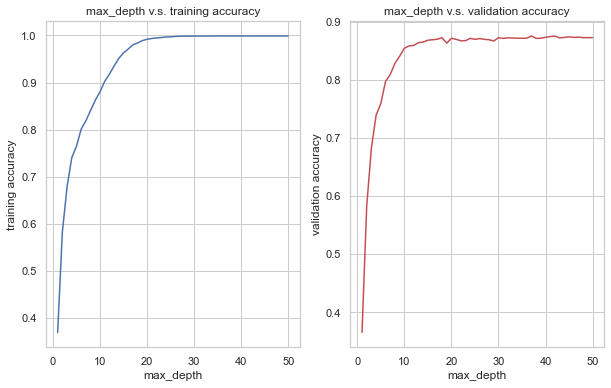

In [21]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(max_depth_list, acc_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training accuracy')
ax[0].set_title('max_depth v.s. training accuracy')
ax[0].grid(True)

ax[1].plot(max_depth_list, acc_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation accuracy')
ax[1].set_title('max_depth v.s. validation accuracy')
ax[1].grid(True)

Find the max_depth_best

In [22]:
Temp1 = np.argmax(acc_val_list,axis=0) 
max_depth_best =(max_depth_list[Temp1])
max_depth_best

37

Calculate the accurancy on test set-the best depth

In [23]:
RF = RandomForestClassifier(n_estimators=20,max_depth=max_depth_best, random_state=0,class_weight='balanced')
RF.fit(X_train, Y_train)
Y_test_pred=RF.predict(X_test)
confusion_test=confusion_matrix(Y_test, Y_test_pred)
acc_test_Random_Forest=weighted_accuracy(confusion_test)
print('classification accuracy on test set is ', acc_test_Random_Forest)

classification accuracy on test set is  0.86704195


# Classification of Fashion-MNIST images-Using MLP model

Import required modules

In [24]:
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.datasets import mnist
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

load the data file

In [25]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

feature normalization to training, and test set

In [26]:
#reshape
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)
train_images = train_images.astype('float32')
test_images= test_images.astype('float32')

#normalize the value of every pixel into the range of 0 to 1
train_images /= 255
test_images /= 255
print(train_images.shape[0], 'training samples')
print(test_images.shape[0], 'test samples')

60000 training samples
10000 test samples


The data was Seperated train set and validation set

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', test_images.shape, test_labels.shape)

train: (54000, 784) (54000,)
validation: (6000, 784) (6000,)
test: (10000, 784) (10000,)


show the images

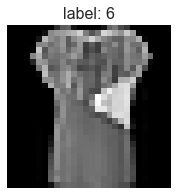

<Figure size 432x288 with 0 Axes>

In [28]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 1000):
    I = x_train[n,:].reshape(28,28)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

The first image in the training set

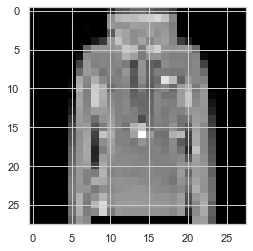

In [29]:
plt.imshow(x_train[0].reshape(28,28), cmap='gray')

Define the MLP model

In [30]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(784,)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=10,  activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),
              metrics=['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


Train MLP model

In [31]:
history=model.fit(x_train, y_train, batch_size=128, epochs=64, validation_data=(x_val, y_val))

Train on 54000 samples, validate on 6000 samples
Epoch 1/64
54000/54000 [==============================] - 2s 39us/sample - loss: 0.5128 - acc: 0.8175 - val_loss: 0.3859 - val_acc: 0.8598
Epoch 2/64
  128/54000 [..............................] - ETA: 3s - loss: 0.4534 - acc: 0.8516

C:\Users\USER\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


54000/54000 [==============================] - 2s 33us/sample - loss: 0.3617 - acc: 0.8676 - val_loss: 0.3481 - val_acc: 0.8755
Epoch 3/64
54000/54000 [==============================] - 2s 37us/sample - loss: 0.3265 - acc: 0.8794 - val_loss: 0.3172 - val_acc: 0.8823
Epoch 4/64
54000/54000 [==============================] - 2s 41us/sample - loss: 0.3035 - acc: 0.8880 - val_loss: 0.3417 - val_acc: 0.8727
Epoch 5/64
54000/54000 [==============================] - 2s 44us/sample - loss: 0.2867 - acc: 0.8935 - val_loss: 0.3122 - val_acc: 0.8870
Epoch 6/64
54000/54000 [==============================] - 3s 49us/sample - loss: 0.2688 - acc: 0.8986 - val_loss: 0.3241 - val_acc: 0.8842
Epoch 7/64
54000/54000 [==============================] - 2s 44us/sample - loss: 0.2523 - acc: 0.9046 - val_loss: 0.2936 - val_acc: 0.8925
Epoch 8/64
54000/54000 [==============================] - 2s 45us/sample - loss: 0.2444 - acc: 0.9073 - val_loss: 0.3106 - val_acc: 0.8915
Epoch 9/64
54000/54000 [==============

Show the relationship between accuracy and epoch & loss and epoch

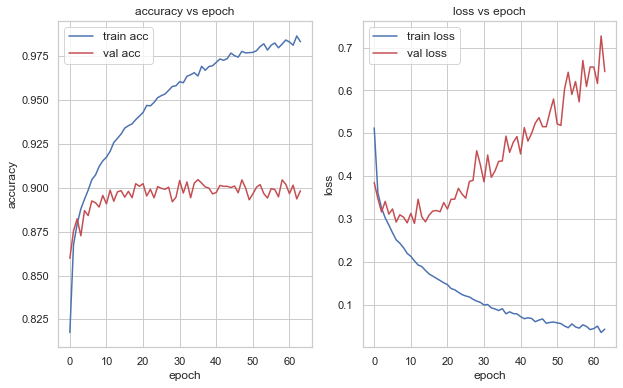

In [32]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].plot(history.history['acc'], '-b', label='train acc')
ax[0].plot(history.history['val_acc'], '-r', label='val acc')
ax[0].set_title('accuracy vs epoch')
ax[0].set_xlabel('epoch')
ax[0].set_ylabel('accuracy')
ax[0].legend(fontsize=12)
ax[0].grid(True)

ax[1].plot(history.history['loss'], '-b', label='train loss')
ax[1].plot(history.history['val_loss'], '-r', label='val loss')
ax[1].set_title('loss vs epoch')
ax[1].set_xlabel('epoch')
ax[1].set_ylabel('loss')
ax[1].legend(fontsize=12)
ax[1].grid(True)

Calculate the accurancy on test set

In [33]:
score_MLP = model.evaluate(test_images, test_labels, batch_size=64, verbose=0)
print('Test loss:', score_MLP[0])
print('Test accuracy:', score_MLP[1])

Test loss: 0.7329409900625237
Test accuracy: 0.892


# Classification of Fashion-MNIST images-Using 2D CNN

select GPU

In [34]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Import required modules

In [35]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np
import tensorflow.keras as keras
import sys
sys.modules['keras'] = keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import SGD
from keras.datasets import mnist

fix the seeds of random number generators

In [36]:
import random
random.seed(0)
np.random.seed(0)

Define the network

In [37]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=120, kernel_size=(5,5), strides=(1,1), padding='valid', activation = 'relu'))
model.add(Flatten())
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10,  activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         48120     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

Load data and normalization data

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255 
x_test/=255

Resize the images from 28x28 to 32x32

In [39]:
from skimage.transform import resize
x_train_resized=np.zeros((x_train.shape[0],32,32), dtype=np.float32)
for n in range(0, x_train.shape[0]):
    x = x_train[n,:,:]
    x = resize(x, [32, 32], mode='edge')
    x_train_resized[n,:,:]=x
x_test_resized=np.zeros((x_test.shape[0],32,32), dtype=np.float32)
for n in range(0, x_test.shape[0]):
    x = x_test[n,:,:]
    x = resize(x, [32, 32], mode='edge')
    x_test_resized[n,:,:]=x
x_train=x_train_resized
x_test=x_test_resized

Reshape every data point

In [40]:
x_train=x_train.reshape(-1,32,32,1)
x_test=x_test.reshape(-1,32,32,1)

The data was Seperated train set and validation set

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=0)
print('train:', x_train.shape, y_train.shape)
print('validation:', x_val.shape, y_val.shape)
print('test:', test_images.shape, test_labels.shape)

train: (54000, 32, 32, 1) (54000,)
validation: (6000, 32, 32, 1) (6000,)
test: (10000, 784) (10000,)


Show images

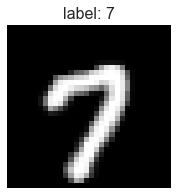

<Figure size 432x288 with 0 Axes>

In [42]:
fig, ax = plt.subplots(figsize=(3, 3))
for n in range(0, x_train.shape[0], 5000):
    I = x_train[n].reshape(32,32)
    ax.imshow(I, cmap='gray')
    ax.set_title('label: ' + str(int(y_train[n])), fontsize=16)
    ax.axis('off')
    plt.draw()
    display.clear_output(wait=True)
    display.display(fig)
    plt.pause(0.1) 

train the neural network model over many epochs

In [43]:
loss_train_list=[]
acc_train_list=[]
loss_val_list=[]
acc_val_list=[]
loss_test_list=[]
acc_test_list=[]
epoch_save=-1

In [44]:
for epoch in range(epoch_save+1, 10):
    #-------- training and validation--------------------------------
    print('epoch', epoch)
    #set epochs=1
    history=model.fit(x_train, y_train, batch_size=128, epochs=1, validation_data=(x_val, y_val))    
    loss_train=history.history['loss'][0]
    acc_train=history.history['acc'][0]        
    loss_val=history.history['val_loss'][0]
    acc_val=history.history['val_acc'][0]     
    loss_train_list.append(loss_train)
    acc_train_list.append(acc_train)
    loss_val_list.append(loss_val)
    acc_val_list.append(acc_val)    
    print('epoch', epoch, 'training loss:', loss_train, 'acc:', acc_train)
    print('epoch', epoch, 'validation loss:', loss_val, 'acc:', acc_val)
    #-------- testing --------------------------------
    score = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
    loss_test=score[0]
    acc_test=score[1]
    loss_test_list.append(loss_test)
    acc_test_list.append(acc_test)
    print('epoch', epoch, 'testing loss:', loss_test, 'acc:', acc_test)    
    #--------save model-------------------------
    model.save('LeNet5_Keras_epoch'+str(epoch)+'.h5')    
    epoch_save=epoch

epoch 0
Train on 54000 samples, validate on 6000 samples
54000/54000 [==============================] - 13s 234us/sample - loss: 0.3252 - acc: 0.9033 - val_loss: 0.1005 - val_acc: 0.9672
epoch 0 training loss: 0.32518942132261064 acc: 0.9033148
epoch 0 validation loss: 0.10050932655731837 acc: 0.96716666
epoch 0 testing loss: 0.09156646437346935 acc: 0.9711
epoch 1
Train on 54000 samples, validate on 6000 samples
54000/54000 [==============================] - 12s 227us/sample - loss: 0.0905 - acc: 0.9721 - val_loss: 0.0693 - val_acc: 0.9772
epoch 1 training loss: 0.09053922555623231 acc: 0.97205555
epoch 1 validation loss: 0.06929022241632143 acc: 0.97716665
epoch 1 testing loss: 0.06747253027400002 acc: 0.9782
epoch 2
Train on 54000 samples, validate on 6000 samples
54000/54000 [==============================] - 13s 243us/sample - loss: 0.0633 - acc: 0.9804 - val_loss: 0.0629 - val_acc: 0.9812
epoch 2 training loss: 0.06334436908309106 acc: 0.98044443
epoch 2 validation loss: 0.062862

Calculate the accurancy on test set

In [45]:
score_2D_CNN = model.evaluate(x_test, y_test, batch_size=64, verbose=0)
print('Test loss:', score_2D_CNN[0])
print('Test accuracy:', score_2D_CNN[1])

Test loss: 0.0322244547358423
Test accuracy: 0.9895


Compared accurancy value of logistic regressin/ Random Forest,MLP model, and 2D CNN

In [46]:
import statistics

print('Logistic regression model ', acc_test_LR)

print('Random Forest model ', acc_test_Random_Forest)

print('MLP model',score_MLP[1])

print('2D CNN model',score_2D_CNN[1])

Logistic regression model  0.7604
Random Forest model  0.86704195
MLP model 0.892
2D CNN model 0.9895


In [47]:
#First, I build a logistic regressin, Random Forest,MLP,and 2D CNN model.
# At Logistic regression model, I use the method of tensorflow to code. I build 3 layers, including input layer, hidden layer, and output layer.
# At Random forest model, I use the method of sklearn to build the model, and I find the best depth to calculate the accuracy. 
# At MLP model, I use the method of keras to build 4 layers and nonlinear activation (relu and Sigmoid).
# At 2D CNN model, I use the method of keras to build 3 convolution layers, 2 pooling layers, and 2 fully connected.
#Second, I compared the accuracy of logistic regressin/ Random Forest,MLP,and 2D CNN on test set.
#Finally, I found the results as follows.

#Conclusion:
# 1. Based on the result, we can find that the accuracy of logistic regressin/ Random Forest,MLP,and 2D CNN model
#    are 0.7604, 0.867, 0.892, and 0.9895.
# 2. Therefore, we get the accuracy from high to low. The first one is 2D CNN model. The second one is MLP model.
#    The third one is Random Forest, and the last one is logistic regressin.